In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/emailspam.csv")
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [3]:
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [4]:
df = df.drop_duplicates()
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words="english")
x= vectorizer.fit_transform(df["Text"])
y= df["IsSpam"]

#### ngram_range specifies the size of the n-grams that will be used to create the feature vector. An n-gram is a sequence of n words. For example, ngram_range=(1,2) will create features for unigrams (single words) and bigrams (two-word sequences). <br>

stop_words is a list of words that will be ignored when creating the feature vector. This can be useful for removing common words that do not provide much information, such as "the", "and", and "of".
<br><br>
ngram_range can be any tuple of two integers. The first integer is the minimum size of the n-gram, and the second integer is the maximum size. For example, ngram_range=(1,3) will create features for unigrams, bigrams, and trigrams.
<br><br>
stop_words can be a list of words, a string containing a comma-separated list of words, or the name of a file containing a list of words. If stop_words is None, then no stop words will be used.


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=0)

#### The next step is to train a Naive Bayes classifier using Scikit’s MultinomialNB class:

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

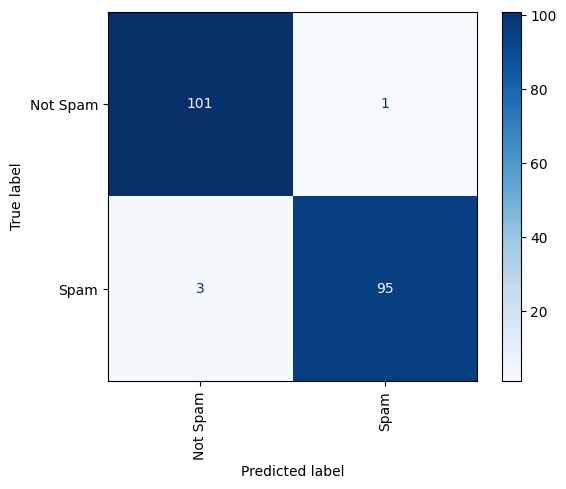

In [8]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model,x_test,y_test,display_labels=["Not Spam","Spam"],cmap="Blues",xticks_rotation="vertical")

In [9]:
model.score(x_test,y_test)

0.98

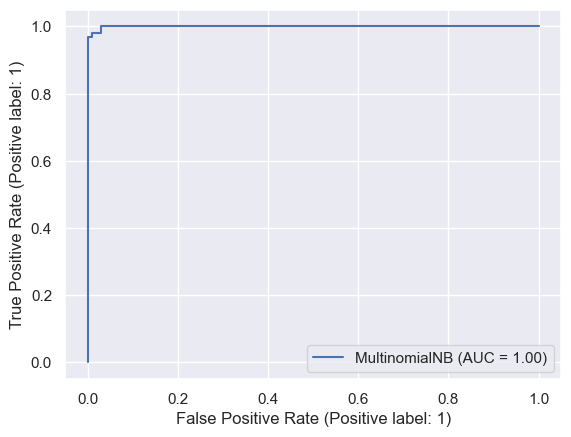

In [11]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()
rcd.from_estimator(model,x_test,y_test)

In [12]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [13]:
model.predict_proba(input)[0][0]

0.9999497111473539

In [14]:
msg = 'Why pay more for expensive meds when you can order them online ' \
      'and save $$$?'

input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [15]:
model.predict_proba(input)[0][0]

0.00021423891260677753

In [16]:
model.predict_proba(input)[0][1]

0.9997857610873945